<a href="https://colab.research.google.com/github/RheedWhan/Online-Retail/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Settings to make numbers easy to read on this display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [ ]:
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541910, 8)

In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.00,541910,541910.00,406830.00
mean,9.55,2011-07-04 13:35:22.342307584,4.61,15287.68
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [ ]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [ ]:
df = df.rename(columns={'Customer ID': 'CustomerID'})
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df[df.CustomerID.isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
df[df.Price < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df[df.Quantity < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [ ]:
df.Invoice = df.Invoice.astype('str')

In [ ]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
CustomerID,float64
Country,object


In [ ]:
df[df.Invoice.str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [ ]:
df.Invoice.str.replace(r'[0-9]+', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df.Invoice.str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df[df.StockCode.str.match("^\\d{5}") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.00,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.00,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.00,EIRE
...,...,...,...,...,...,...,...,...
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.00,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.00,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.00,Germany


In [ ]:
df[df.StockCode.str.match("^\\d{5}") == False]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [ ]:
df[df.Description.isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
2023,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
2024,536550,85044,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.00,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.00,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom


In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df[df.Country == 'Unspecified'].shape

(446, 8)

In [ ]:
df.corr(numeric_only=True) # Set numeric_only parameter to True to only include numerical columns

,Quantity,Price,CustomerID
Quantity,1.00,-0.00,-0.00
Price,-0.00,1.00,-0.00
CustomerID,-0.00,-0.00,1.00


## Data Cleaning

In [ ]:
cleaned_df = df.copy()

In [ ]:
cleaned_df = cleaned_df[cleaned_df.StockCode.str.match("^\\d{5}") == True]
cleaned_df = cleaned_df[cleaned_df.Invoice.str.match("^\\d{6}$") == True]
cleaned_df = cleaned_df.dropna(subset=['CustomerID'])
cleaned_df = cleaned_df[cleaned_df.Price > 0]

In [ ]:
cleaned_df.describe()

In [ ]:
original_rows = df.shape[0]
cleaned_rows = cleaned_df.shape[0]
percentage_lost = ((original_rows - cleaned_rows) / original_rows) * 100

print(f"Percentage of data lost during cleaning: {percentage_lost:.2f}%")

## Feature Engineering

In [ ]:
cleaned_df['SalesLineTotal'] = cleaned_df.Quantity * cleaned_df.Price
cleaned_df.head()

In [ ]:
aggregated_df = cleaned_df.groupby('CustomerID', as_index=False).agg(
   Frequency = ('Invoice', 'nunique'),
   UniqueQuantity =  ('Quantity', 'sum'),
    MonetaryValue = ('SalesLineTotal', 'sum'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)
aggregated_df.head()

In [ ]:
max_invoice_date = aggregated_df.LastInvoiceDate.max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df.LastInvoiceDate).dt.days
aggregated_df.head()

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df.MonetaryValue, bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution', color='white')
plt.xlabel('Monetary Value', color='white')
plt.ylabel('Count', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df.Frequency, bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution', color='white')
plt.xlabel('Frequency', color='white')
plt.ylabel('Count', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df.Recency, bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution', color='white')
plt.xlabel('Recency', color='white')
plt.ylabel('Count', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.boxplot(y=aggregated_df.MonetaryValue, color='skyblue')
plt.title('Monetary Value Distribution', color='white')
plt.ylabel('Monetary Value', color='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 2)
sns.boxplot(y=aggregated_df.Frequency, color='lightgreen')
plt.title('Frequency Distribution', color='white')
plt.ylabel('Frequency', color='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 3)
sns.boxplot(y=aggregated_df.Recency, color='salmon')
plt.title('Recency Distribution', color='white')
plt.ylabel('Recency', color='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the interquartile range (IQR) for MonetaryValue
Q1_monetary = aggregated_df['MonetaryValue'].quantile(0.25)
Q3_monetary = aggregated_df['MonetaryValue'].quantile(0.75)
IQR_monetary = Q3_monetary - Q1_monetary

print(f"Interquartile Range (IQR) for MonetaryValue: {IQR_monetary:.2f}")


In [ ]:
# Calculate the upper and lower bounds for outliers
lower_bound_monetary = Q1_monetary - 1.5 * IQR_monetary
upper_bound_monetary = Q3_monetary + 1.5 * IQR_monetary

# Create a DataFrame for outliers in MonetaryValue
outliers_monetary_df = aggregated_df[(aggregated_df.MonetaryValue < lower_bound_monetary) | (aggregated_df.MonetaryValue > upper_bound_monetary)]
outliers_monetary_df.describe()


In [ ]:
# Calculate the interquartile range (IQR) for Frequency
Q1_frequency = aggregated_df['Frequency'].quantile(0.25)
Q3_frequency = aggregated_df['Frequency'].quantile(0.75)
IQR_frequency = Q3_frequency - Q1_frequency

print(f"Interquartile Range (IQR) for Frequency: {IQR_frequency:.2f}")

# Calculate the upper and lower bounds for outliers
lower_bound_frequency = Q1_frequency - 1.5 * IQR_frequency
upper_bound_frequency = Q3_frequency + 1.5 * IQR_frequency

# Create a DataFrame for outliers in Frequency
outliers_frequency_df = aggregated_df[(aggregated_df.Frequency < lower_bound_frequency) | (aggregated_df.Frequency > upper_bound_frequency)]
outliers_frequency_df.describe()


In [ ]:
no_outliers_df = aggregated_df[(~aggregated_df.index.isin(outliers_monetary_df.index)) & (~aggregated_df.index.isin(outliers_frequency_df.index))]

no_outliers_df.describe()

In [ ]:
no_outliers_df.shape

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.boxplot(y=no_outliers_df.MonetaryValue, color='skyblue')
plt.title('Monetary Value Distribution', color='white')
plt.ylabel('Monetary Value', color='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 2)
sns.boxplot(y=no_outliers_df.Frequency, color='lightgreen')
plt.title('Frequency Distribution', color='white')
plt.ylabel('Frequency', color='white')
plt.tick_params(axis='y', colors='white')

plt.subplot(1, 3, 3)
sns.boxplot(y=no_outliers_df.Recency, color='salmon')
plt.title('Recency Distribution', color='white')
plt.ylabel('Recency', color='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(no_outliers_df.MonetaryValue, no_outliers_df.Frequency, no_outliers_df.Recency, c='skyblue', marker='o')

ax.set_xlabel('Monetary Value', color='white')
ax.set_ylabel('Frequency', color='white')
ax.set_zlabel('Recency', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

ax.set_title('3D Scatter Plot of Monetary Value, Frequency, and Recency', color='white')

plt.show()

In [ ]:
# Standard Scaling (Z-score Normalization)

# Definition:
# Standard scaling transforms data by subtracting the mean and dividing by the standard deviation.
# This process centers the data around 0 with a standard deviation of 1.

# Formula:
# z = (x - μ) / σ

# where:
# - z is the scaled value.
# - x is the original value.
# - μ is the mean of the feature.
# - σ is the standard deviation of the feature.

# Benefits:
# - Handles outliers better than Min-Max scaling.
# - Ensures that features with larger values do not dominate the model.
# - Improves performance of algorithms sensitive to feature scales (e.g., K-means clustering).


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(no_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_df = pd.DataFrame(scaled_data, index=no_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_df

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_df.MonetaryValue, scaled_df.Frequency, scaled_df.Recency, c='skyblue', marker='o')

ax.set_xlabel('Monetary Value', color='white')
ax.set_ylabel('Frequency', color='white')
ax.set_zlabel('Recency', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

ax.set_title('3D Scatter Plot of Scaled Monetary Value, Frequency, and Recency', color='white')

plt.show()


## KMeans Clustering

In [ ]:
max_k = 12

inertia_values = []
silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_df)

    sil_score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(sil_score)

    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='skyblue')
plt.title('KMeans for differnt values of Clusters (K)', color='white')
plt.xlabel('Number of Clusters (K)', color='white')
plt.ylabel('Inertia', color='white')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='lightgreen')
plt.title('Silhouette Score for different values Clusters (K)', color='white')
plt.xlabel('Number of Clusters (K)', color='white')
plt.ylabel('Silhouette Score', color='white')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: what is the silhoutte score. the mathematical formula, how, when, and why it is used

# Silhouette Score

# Mathematical Formula:

# The silhouette score for a single data point i is calculated as:

# s(i) = (b(i) - a(i)) / max(a(i), b(i))

# Where:

# - a(i): The average distance from data point i to other data points in the same cluster. It measures how well the data point fits within its own cluster.
# - b(i): The average distance from data point i to the data points in the nearest cluster that the data point i does not belong to. It measures how dissimilar a data point is to its neighboring clusters.


# How it is Used:

# 1.  Fit a clustering algorithm (like KMeans) to your data.
# 2.  Calculate the silhouette score for each data point using the formula above.
# 3.  The overall silhouette score for the clustering is the average of the silhouette scores for all data points.


# When it is Used:

# - Evaluating the quality of a clustering solution. It helps to determine how well-separated the clusters are and how well the data points are assigned to their respective clusters.
# - Comparing different clustering algorithms or parameter settings (like the number of clusters in KMeans).
# - Assessing the validity of the clustering results, particularly when there is no ground truth available.

# Why it is Used:

# - It provides a quantitative measure of cluster quality that is easy to interpret.
# - It is a more robust metric than inertia (within-cluster sum of squares) when dealing with non-spherical clusters or clusters with varying densities.
# - It helps to identify the optimal number of clusters in an unsupervised learning setting by choosing the clustering with the highest silhouette score.


# Code Example:

# Assuming you have a 'scaled_df' and a clustering solution named 'kmeans':

# from sklearn.metrics import silhouette_score

# cluster_labels = kmeans.labels_
# silhouette_avg = silhouette_score(scaled_df, cluster_labels)
# print(f"Silhouette Score: {silhouette_avg}")

# output; The average silhouette score is: 0.3373093514876233

# Interpretation:

# - Values close to 1 indicate that the data points are well clustered and are far away from neighboring clusters.
# - Values close to 0 indicate that the data points are on or very close to the decision boundary between two clusters.
# - Values close to -1 indicate that the data points might be assigned to the wrong cluster and are more similar to neighboring clusters than their own.



In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_df)

cluster_labels

In [ ]:
no_outliers_df['Cluster'] = cluster_labels
no_outliers_df.head()

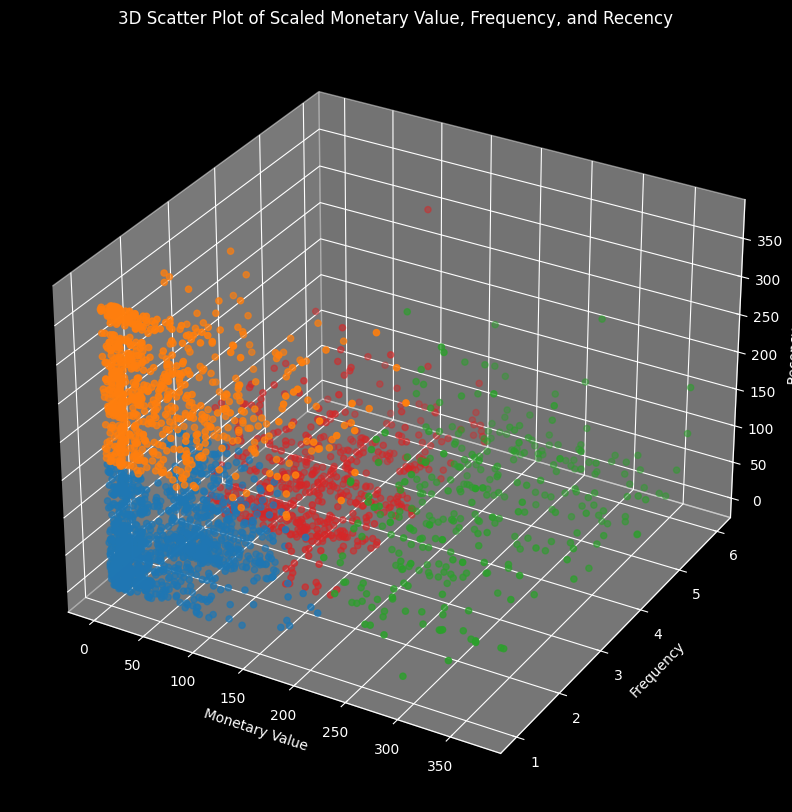

In [ ]:
clusters_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = no_outliers_df['Cluster'].map(clusters_colors)

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(no_outliers_df.MonetaryValue, no_outliers_df.Frequency, no_outliers_df.Recency, c= colors, marker = 'o')

ax.set_xlabel('Monetary Value', color='white')
ax.set_ylabel('Frequency', color='white')
ax.set_zlabel('Recency', color='white')
ax.set_title('3D Scatter Plot of Scaled Monetary Value, Frequency, and Recency', color='white')

ax.tick_params(axis='x', colors='white')

plt.show()

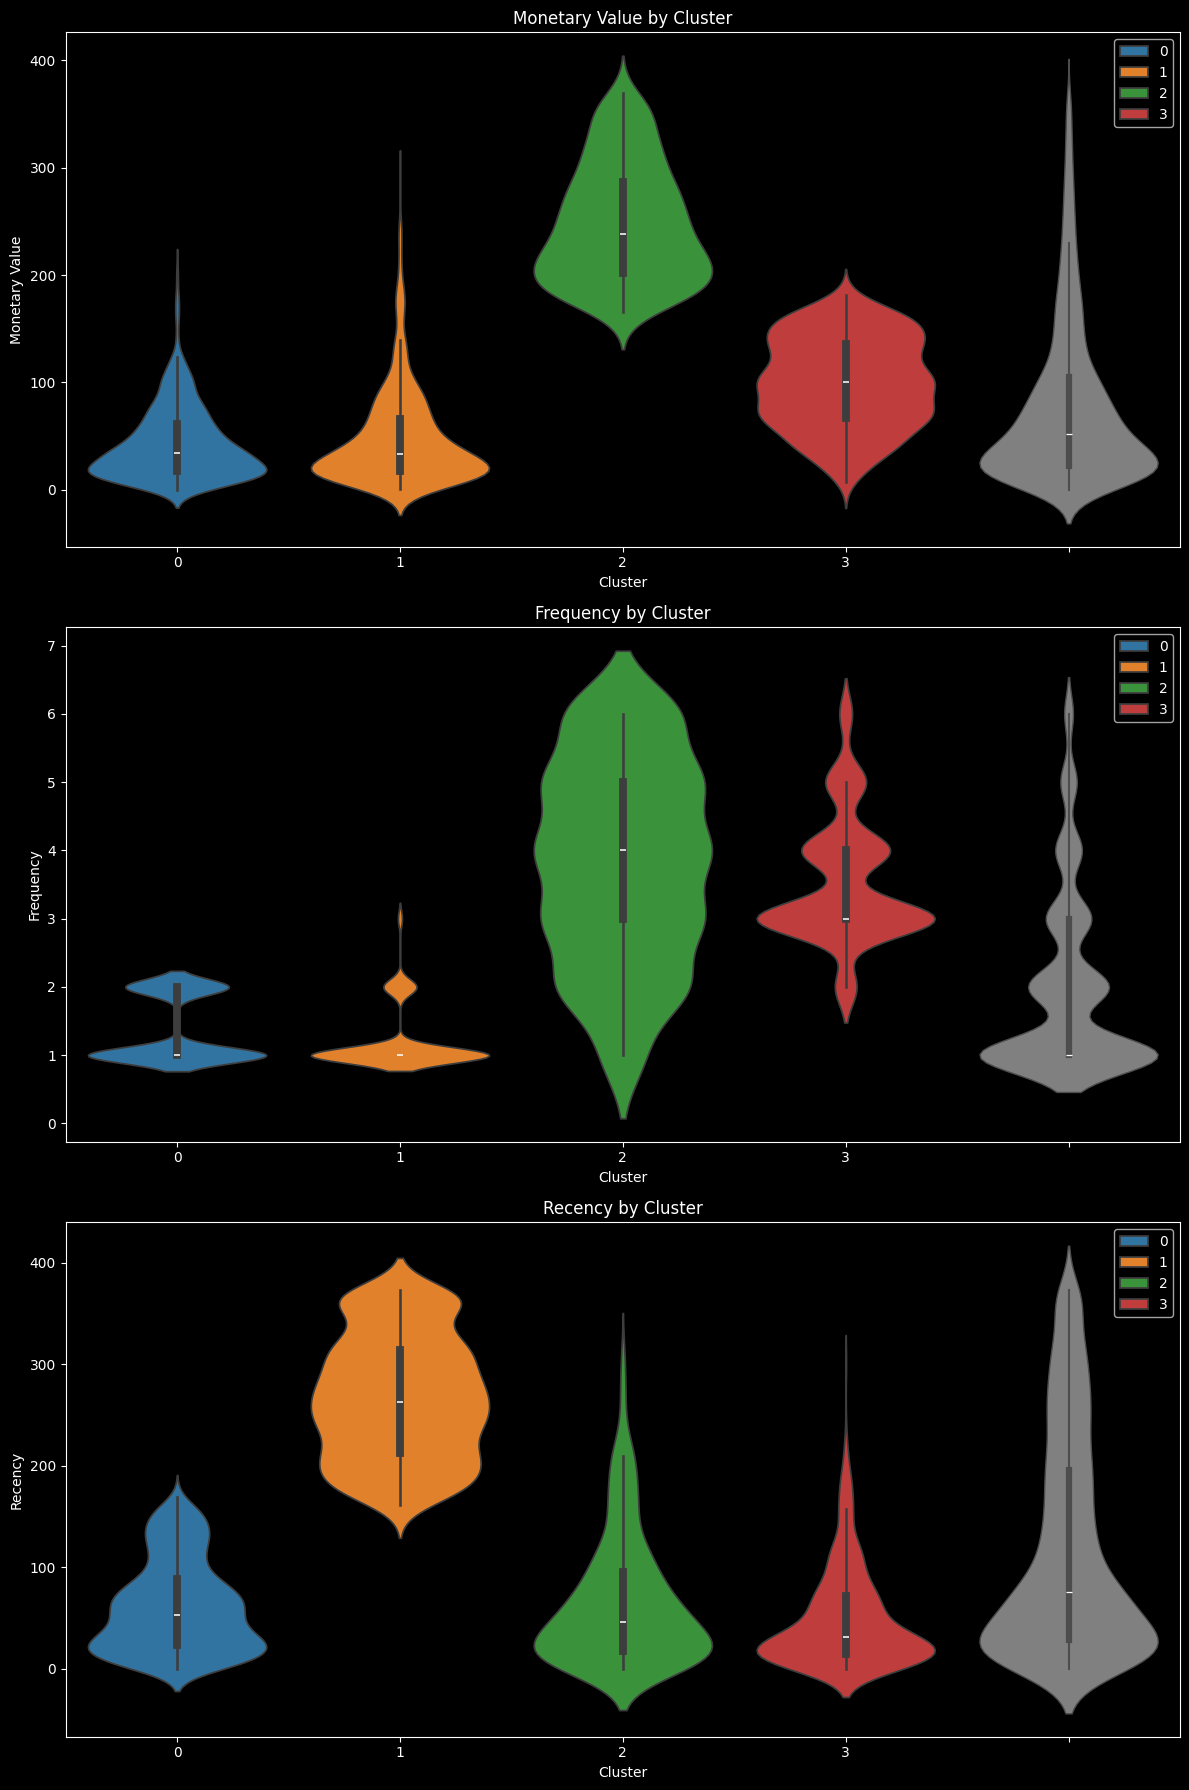

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['MonetaryValue'], palette=clusters_colors, hue=no_outliers_df["Cluster"])
sns.violinplot(y=no_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['Frequency'], palette=clusters_colors, hue=no_outliers_df["Cluster"])
sns.violinplot(y=no_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=no_outliers_df['Cluster'], y=no_outliers_df['Recency'], palette=clusters_colors, hue=no_outliers_df["Cluster"])
sns.violinplot(y=no_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


**Cluster 0 (Blue): "Retain"**

* Rationale: This cluster represents high-value customers who
purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

**Cluster 1 (Orange): "Re-Engage"**

* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

**Cluster 2 (Green): "Nurture"**

* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

**Cluster 3 (Red): "Reward"**

* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [57]:
overlap_indices = outliers_monetary_df.index.intersection(outliers_frequency_df.index)

monetary_only_outliers = outliers_monetary_df.drop(overlap_indices)
frequency_only_outliers = outliers_frequency_df.drop(overlap_indices)
monetary_and_frequency_outliers = outliers_monetary_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outliers_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outliers_df

,CustomerID,Frequency,UniqueQuantity,MonetaryValue,LastInvoiceDate,Recency,Cluster
7,12357.00,1,330,905.70,2011-11-06 16:07:00,32,-1
8,12358.00,2,100,586.20,2011-12-08 10:26:00,1,-1
14,12370.00,3,229,450.23,2011-10-19 14:51:00,50,-1
37,12403.00,1,92,381.80,2011-10-21 10:51:00,49,-1
39,12406.00,2,120,484.40,2011-11-17 19:22:00,21,-1
...,...,...,...,...,...,...,...
3176,18118.00,24,371,699.82,2011-11-29 11:32:00,10,-3
3205,18172.00,8,604,1564.20,2011-11-25 11:12:00,14,-3
3238,18223.00,10,207,527.25,2011-10-31 09:48:00,39,-3
3240,18225.00,10,428,729.66,2011-11-18 13:16:00,20,-3


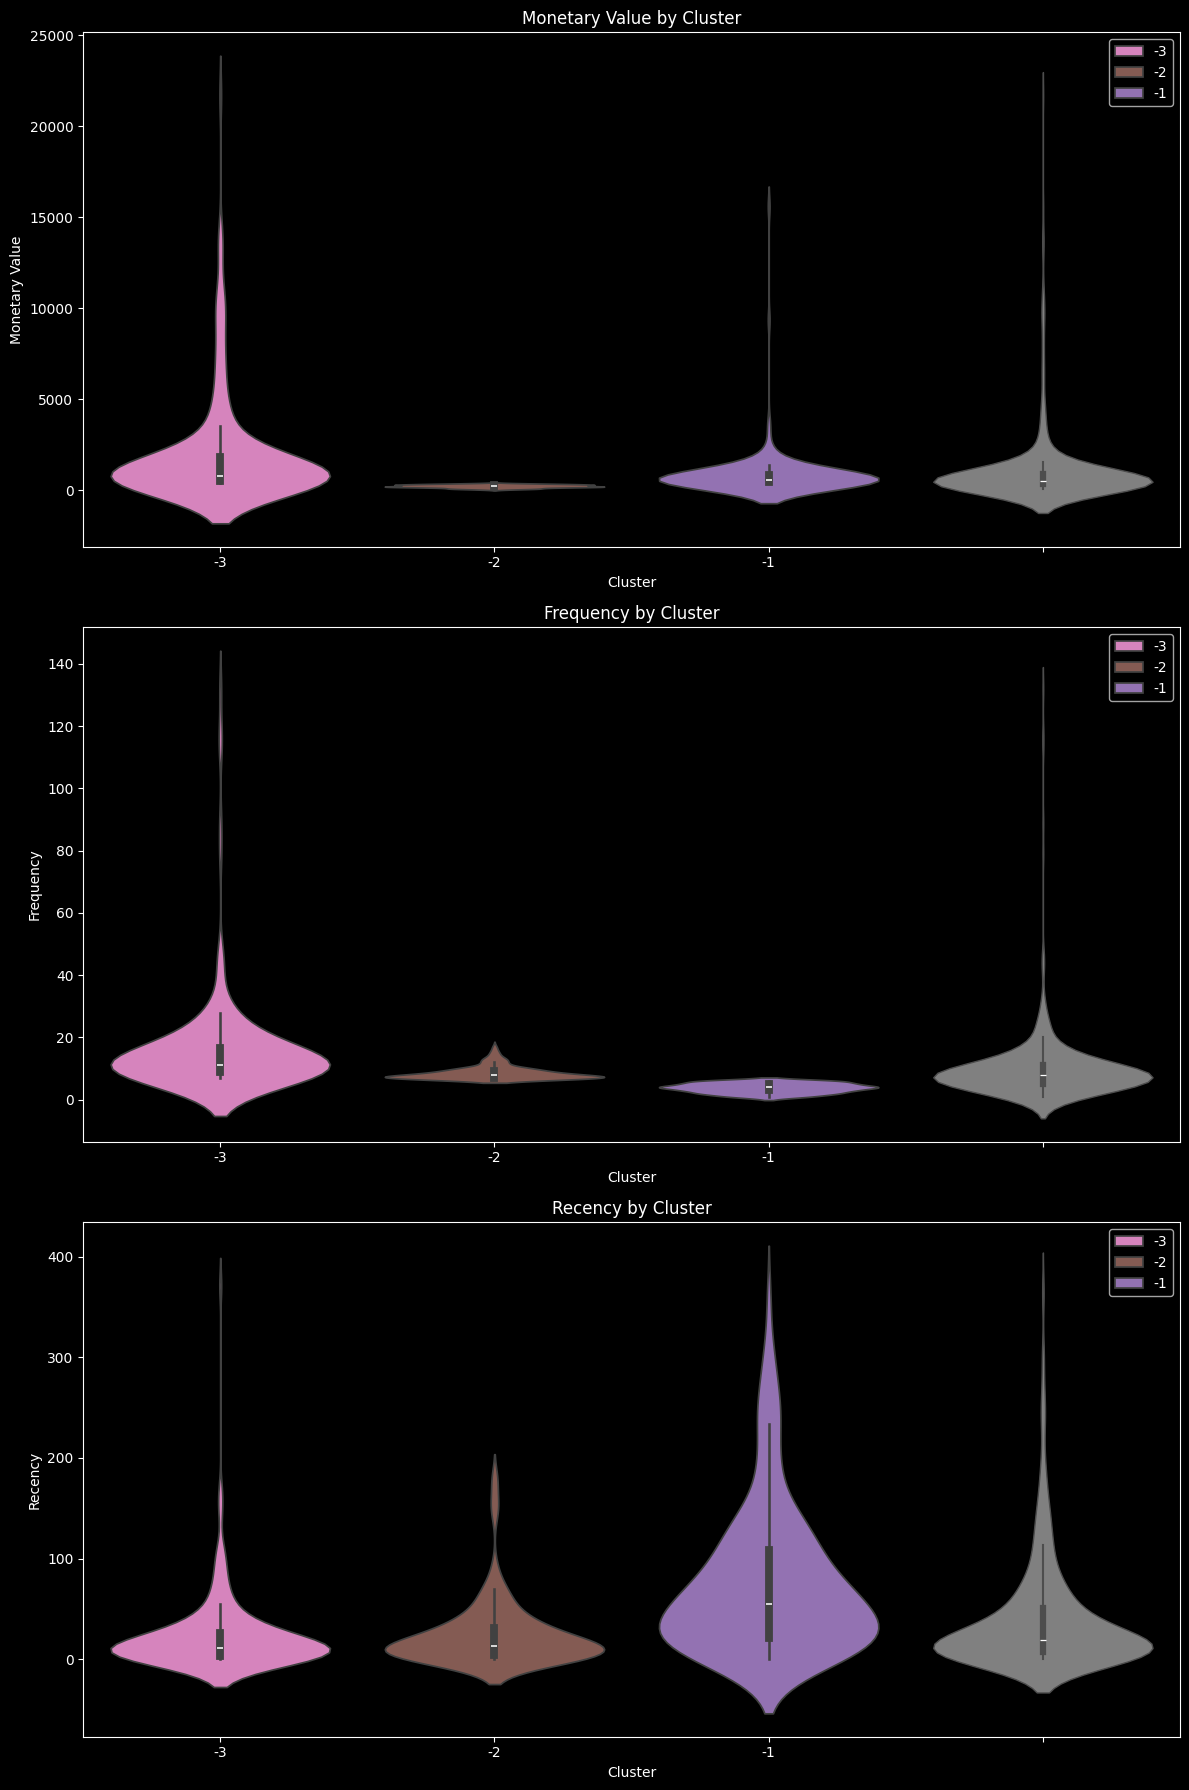

In [61]:
clusters_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['MonetaryValue'], palette=clusters_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Frequency'], palette=clusters_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Recency'], palette=clusters_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High
spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [62]:
cluster_labels = {
    0: 'Retain',
    1: 'Re-Engage',
    2: 'Nurture',
    3: 'Reward',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'
}

full_clustering_df = pd.concat([no_outliers_df, outliers_df])
full_clustering_df['Cluster_labels'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,CustomerID,Frequency,UniqueQuantity,MonetaryValue,LastInvoiceDate,Recency,Cluster,Cluster_labels
1,12349.00,1,19,85.13,2011-11-21 09:51:00,18,0,Retain
2,12350.00,1,28,36.40,2011-02-02 16:01:00,309,1,Re-Engage
3,12352.00,1,10,12.50,2011-09-20 14:34:00,79,0,Retain
4,12354.00,1,4,16.60,2011-04-21 13:11:00,231,1,Re-Engage
5,12355.00,1,30,96.30,2011-05-09 13:49:00,213,1,Re-Engage
...,...,...,...,...,...,...,...,...
3176,18118.00,24,371,699.82,2011-11-29 11:32:00,10,-3,DELIGHT
3205,18172.00,8,604,1564.20,2011-11-25 11:12:00,14,-3,DELIGHT
3238,18223.00,10,207,527.25,2011-10-31 09:48:00,39,-3,DELIGHT
3240,18225.00,10,428,729.66,2011-11-18 13:16:00,20,-3,DELIGHT


### Visualization

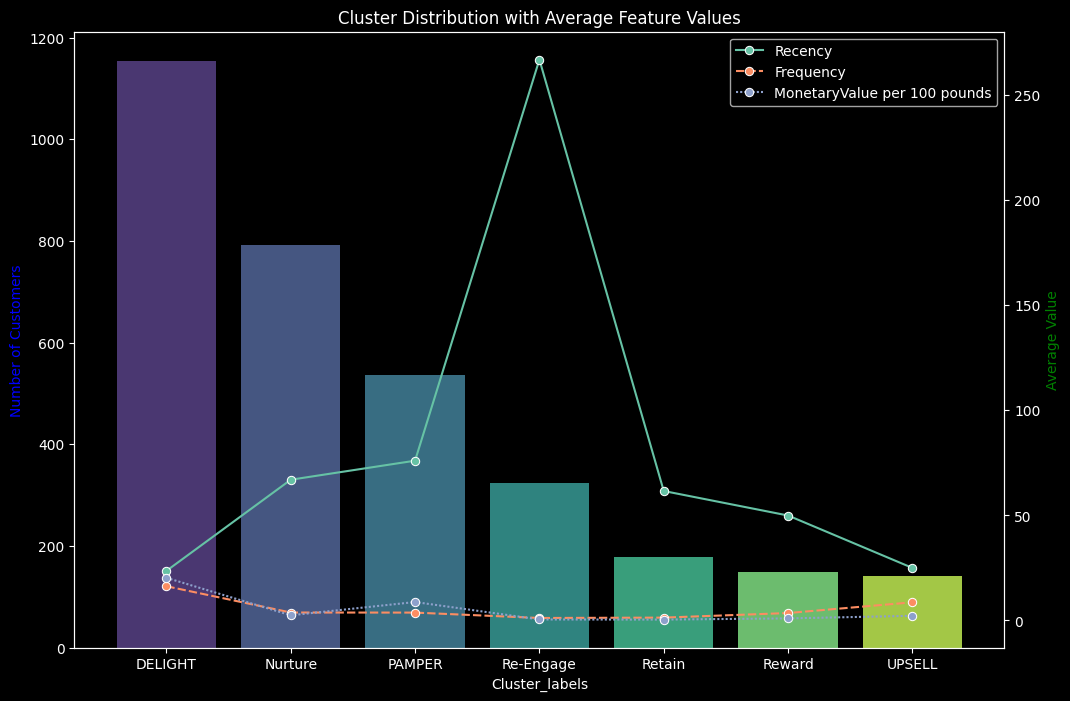

In [64]:
cluster_counts = full_clustering_df['Cluster_labels'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('Cluster_labels')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

# Customer Segmentation Report

## Introduction

This report outlines the results of a customer segmentation analysis performed using historical customer data. The goal is to identify distinct customer groups based on their purchasing behavior (Recency, Frequency, Monetary Value) and develop targeted strategies for each segment.

## Data & Methodology

We analyzed customer data including the date of their last purchase (Recency), how often they purchase (Frequency), and how much they spend (Monetary Value). The process involves:

1.  **Data Cleaning:** We removed outliers in the Frequency and Monetary Value features, which can distort the analysis.
2.  **Data Transformation:** The data was then standardized (scaled) to ensure that all variables have a similar scale, which is important for some clustering algorithms.
3.  **Customer Segmentation (Clustering):** We used a K-Means clustering algorithm to identify the optimal number of clusters (groups) in our data based on their Recency, Frequency, and Monetary Value. We found that four clusters provided the most meaningful segmentation.
4.  **Cluster Analysis and Interpretation:** We analyze the characteristics of each customer segment and provide action recommendations for businesses to target each segment effectively.

## Cluster Descriptions and Recommendations

### Core Clusters

* **Retain (Blue Cluster):**  High-value customers who purchase regularly, though not always very recently. They're your loyal customers.
    * **Action:** Focus on retention efforts to maintain their loyalty and spending levels. Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
* **Re-Engage (Orange Cluster):** Lower-value, infrequent buyers who haven’t purchased recently.
    * **Action:** Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.
* **Nurture (Green Cluster):** Least active and lowest-value customers, but they have made recent purchases. These could be new customers.
    * **Action:** Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
* **Reward (Red Cluster):** High-value, very frequent buyers, who are still actively purchasing. These are your most loyal customers.
    * **Action:** Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

### Outlier Clusters

* **PAMPER (Purple Cluster):** High spenders but not necessarily frequent buyers. They are likely those with large and infrequent purchases.
    * **Action:** Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.
* **UPSELL (Brown Cluster):** Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
    * **Action:** Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.
* **DELIGHT (Pink Cluster):** Most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
    * **Action:** Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


## Conclusion

Customer segmentation based on RFM (Recency, Frequency, Monetary Value) has provided insights into distinct customer behaviors. The clusters generated offer a framework for targeted marketing strategies to optimize customer retention, engagement, and growth. Implementing the recommended actions for each segment can lead to a positive impact on business profitability and customer satisfaction.

## Next Steps

* Review and refine the targeting strategies for each customer segment based on the company's business goals and resources.
* Implement specific marketing campaigns and actions for each segment, such as loyalty programs, targeted promotions, and personalized communications.
* Monitor the impact of these targeted actions on key business metrics (e.g., sales, customer retention, average order value).
* Consider refining the segmentation model over time as business context and customer behavior evolve.
